# **⭐️⭐️ Pandas ⭐️⭐️**

*출처 : 파이썬 머신러닝 완벽 가이드 (권철민 저)*

## **Pandas 개요 🤓**

### **📍 What is Pandas ?**

- 파이썬의 대표적인 데이터 처리 패키지
- 2차원 데이터 처리에 특화되어 있으며, 맷플롯립을 호출해 쉽게 시각화 기능을 지원 

## **Get into Pandas 👾**

### **📍 Pandas 불러오기**

In [27]:
import pandas as pd

### **📍 Pandas Data Type**

1. Series : Index와 단 하나의 칼럼으로 구성된 데이터 구조체
2. Data Frame : 칼럼이 여러 개인 데이터 구조체 (여러 개의 Series로 이루어졌다고 할 수 있다.)

### **📍 데이터 불러오기**

In [126]:
titanic_df = pd.read_csv('./Data/titanic_train.csv')

### **📍 데이터 확인하기**

#### **1. `.head()`**

- 데이터의 맨 앞에 있는 N개의 로우를 반환
- 기본값 () 은 5개

In [29]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### **2. `.shape()`**

- 행과 열의 갯수를 튜플 형태로 반환
- (row, col)

In [30]:
titanic_df.shape

(891, 12)

#### **3. `.info()`**

- 행과 열의 갯수
- 각 컬럼의 데이터 타입, Not Null 인 건수
- 전체 데이터 타입의 요약

In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **4. `.describe()`**

- 숫자형 데이터에 대한 n-percentile 분포도 (25%, 50%, 75%) / 최댓값, 최솟값 / 평균값 / 표준편차
- 이 메서드만으로 정확한 분포도를 알기는 무리지만, 개략적인 수준의 분포도를 확인할 수 있어 유용하다.

In [32]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### **n-percentile (25%, 50%, 75%)**

Pclass 에 해당하는 데이터 값들을 오름차순으로 정렬했을 때 (낮은 값 -> 높은 값)
- 앞 25% 구간에 해당하는 데이터는 2
- 50% 구간에 해당하는 데이터는 3
- 75% 구간에 해당하는 데이터는 3

`min` ~ `max` 가 `1` ~ `3` 이고, 각 `25%, 50%, 70%` 에 해당하는 데이터들이 `2, 3, 3` 인 것을 미루어 봤을 때,
- Pclass의 데이터는 1, 2, 3 으로 이루어진 것을 짐작할 수 있다.

In [33]:
set(titanic_df['Pclass'].values)

{1, 2, 3}

In [34]:
titanic_pclass = titanic_df['Pclass'].value_counts()
titanic_pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### **5. `df[]`**

* 특정 칼럼의 데이터를 시리즈 (; Index와 단 하나의 칼럼으로 구성된 세트) 형태로 반환

In [36]:
titanic_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

#### **6. `.value_counts()`**

* 특정 칼럼의 데이터값 건수를 시리즈 형태로 반환
* 기본적으로 Null 값을 무시하고 결괏값을 내놓기 때문에 주의해야 한다.
* 기본값은 *dropna=True* 로 `.value_counts(dropna=True)` 와 동일하고, Null 값을 제외하고 반환한다.
* Null 값을 포함해서 카운트 하고 싶다면, `.value_counts(dropna=False)`

In [37]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
titanic_df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

### **📍 DF <-> 리스트/딕셔너리/ndarray 상호변환**

- 특히 사이킷런의 많은 API는 DataFrame을 인자로 입력받을 수 있지만, 기본적을 넘파이 ndarray를 입력 인자로 사용하는 경우가 대부분이기 때문에, DF와 ndarray 상호 간의 변환은 매우 빈번하게 발생한다.

#### **1. 리스트/딕셔너리/ndarray -> DF**

- 리스트/ndarray : column 수대로 column 지정 필요
- 딕셔너리 : 문자열 column명으로 매핑, 리스트/ndarray 칼럼 데이터로 values 매핑

In [40]:
import numpy as np

In [41]:
# 1차원 리스트/ndarray -> DF

col_name1 = ['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)

df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트 to DF:\n', df_list1)

df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray to DF:\n', df_array1)

1차원 리스트 to DF:
    col1
0     1
1     2
2     3
1차원 ndarray to DF:
    col1
0     1
1     2
2     3


In [42]:
# 2차원 리스트/ndarray -> DF

col_name2 = ['col1', 'col2', 'col3']
list2 = [[1, 2, 3],
        [4, 5, 6]]
array2 = np.array(list2)

df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트 to DF:\n', df_list2)

df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray to DF:\n', df_array2)

2차원 리스트 to DF:
    col1  col2  col3
0     1     2     3
1     4     5     6
2차원 ndarray to DF:
    col1  col2  col3
0     1     2     3
1     4     5     6


In [43]:
# 딕셔너리 -> DF

dict = {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('dict to DF:\n', df_dict)

dict to DF:
    col1  col2  col3
0     1     2     3
1    11    22    33


#### **2. DF -> 리스트/딕셔너리/ndarray**

- **DF -> ndarray** (`.values()`)
  - 데이터 핸들링은 DataFrame 을 이용하더라도, 머신러닝 패키지의 입력 인자 등에 적용하기 위해 ndarray 로 변환해야하기 때문에 반드시 기억하기
- **DF -> 리스트** (`.values.tolist()`)
- **DF -> 딕셔너리** (`.to_dict()`)
  - (`.to_dict()`) : 인자 미적용시, 값은 set로 반환
  - (`.to_dict('list')`) : 인자로 'list'를 입력하면 값은 리스트형으로 반환

In [45]:
df_dict

,col1,col2,col3
0,1,2,3
1,11,22,33


In [47]:
# DF -> ndarray

array3 = df_dict.values
print('Type: ', type(array3))
print('Shape: ', array3.shape)
print('DF to ndarray:\n', array3)

Type:  <class 'numpy.ndarray'>
Shape:  (2, 3)
DF to ndarray:
 [[ 1  2  3]
 [11 22 33]]


In [50]:
# DF -> list

list3 = df_dict.values.tolist()
print('Type: ', type(list3))
print('DF to list:\n', list3)

Type:  <class 'list'>
DF to list:
 [[1, 2, 3], [11, 22, 33]]


In [53]:
# DF -> dict (list 인자 미적용)

dict3 = df_dict.to_dict()
print('Type: ', type(dict3))
print('DF to dict:\n', dict3)

Type:  <class 'dict'>
DF to dict:
 {'col1': {0: 1, 1: 11}, 'col2': {0: 2, 1: 22}, 'col3': {0: 3, 1: 33}}


In [54]:
# DF -> dict (list 인자)

dict4 = df_dict.to_dict('list')
print('Type: ', type(dict4))
print('DF to dict:\n', dict4)

Type:  <class 'dict'>
DF to dict:
 {'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


### **📍 Column 데이터 세트 생성/수정**

#### **1. Column 데이터 세트 생성**
- `[]` 내에 새로운 칼럼명을 입력 후, 값을 할당

In [88]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [89]:
# Column 데이터 세트 생성
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


#### **2. Column 데이터 세트 수정**
- 연산자 활용 가능 

In [90]:
titanic_df['Age_by_10'] = titanic_df['Age'] * 10
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0


### **📍 데이터 삭제**

#### **Method**
- `drop()`

<br>

#### **Parameters**
1. **labels**
   - Index 혹은 Column명
2. **axis**
    - axis=0 : Row 축 방향으로 드롭을 수행 / DF에서 특정 Row 를 가리키는 것은 Index 이기 때문에, 자동으로 labels에 오는 값을 인덱스로 간주함 / 이상치 데이터 삭제시 주로 사용
    - axis=1 : Column 축 방향으로 드롭을 수행 / 기존 칼럼 값을 가공해 새로운 칼럼을 만들고 삭제 하는 경우가 많다보니 axis=1를 많이 활용함
4. **inplace**
    - inplace=False : 디폴트 / 자기 자신의 DF의 데이터는 삭제하지 않고, 삭제된 결과를 반환
    - inplace=True : 자신의 DF의 데이터를 삭제
    - 주의 ❗️ : inplace=True로 설정한 채로 반환 값을 다시 자신의 DF 객체로 할당하면 안됨. inplace=True는 반환 값이 None이 되기 때문
      - ❌ 자신의 DF 객체 할당 : titanic_df = titanic_df.drop(['Age_0'], axis=1, inplace=True)
      - ✅ 객체 할당 없이 사용 : titanic_df.drop(['Age_0'], axis=1, inplace=True)
      - ✅ 다른 DF 객체 할당 : drop_result = titanic_df.drop(['Age_0'], axis=1, inplace=True)
      - ✅ (inplace=False) 자신의 DF 객체 할당 : titanic_df = titanic_df.drop(['Age_0'], axis=1, inplace=False) (*inplace=False는 디폴트기 때문에 안써도 무방)

In [98]:
# 예시 DF
col_name4 = ['A', 'B', 'C']
array4 = np.array([[1, 2, 3],
                  [4, 5, 6]])
df4 = pd.DataFrame(array4, columns=col_name4)
df4

,A,B,C
0,1,2,3
1,4,5,6


In [99]:
# axis=1 : Column 축 방향으로 드롭을 수행
df4.drop(['A'], axis=1)

,B,C
0,2,3
1,5,6


In [94]:
# axis=0 : Row 축 방향으로 드롭을 수행
df4.drop(0, axis=0)

,A,B,C
1,4,5,6


In [101]:
# ✅ inplace=True : 객체 할당 없이 사용
df4.drop(['A'], axis=1, inplace=True)
df4

,B,C
0,2,3
1,5,6


In [102]:
# ✅ inplace=True : 다른 DF 객체 할당
drop_result = df4.drop(0, axis=0, inplace=True)
df4

# drop_result = None 반환

,B,C
1,5,6


In [105]:
# ✅ inplace=False : 자신의 DF 객체 할당 (inplace=False 기입시)
df4 = df4.drop(['B'], axis=1, inplace=False)
df4

,C
1,6


In [106]:
# ✅ inplace=False : 자신의 DF 객체 할당 (inplace=False는 디폴트기 때문에 안써도 무방)
df4 = df4.drop(1, axis=0)
df4

,C


In [97]:
# ❌ inplace=True : 자신의 DF 객체 할당
df4 = df4.drop(['B'], axis=1, inplace=True)
df4

AttributeError: 'NoneType' object has no attribute 'drop'

### **📍 Index 객체**

#### Index 객체 추출
- `변수명 = df.index`
- 반환된 Index 객체의 실제값은 넘파이 1차원 ndarray로 볼 수 있음

#### Index 객체를 실제 값 ndarray로 변환
- `변수명.values`

#### 활용
- ✅ 단일 값 / 슬라이싱 반환 가능
- ❌ Index 객체는 함부로 변경 할 수 없음

#### 새로운 Index 설정
- `.reset_index`
- 인덱스가 연속된 Int 숫자형 데이터가 아닐 경우에 다시 연속된 Int 숫자형으로 만들 때 많이 활용
- `.reset_index(inplace=False)`
- `.reset_index(inplace=True)` : 기존 인덱스는 새로운 칼럼으로 추가되지 않고 삭제(drop) 됨

In [109]:
# Index 객체 추출
indexes = titanic_df.index
indexes

RangeIndex(start=0, stop=891, step=1)

In [110]:
# Index 객체를 실제 값 ndarray로 변환
indexes.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [111]:
# ✅ 활용 - 단일 값 / 슬라이싱 반환 가능
print(indexes[:50].values)
print(indexes.values[:50])
print(indexes[50])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
50


In [112]:
# ❌ 활용 - Index 객체는 함부로 변경 할 수 없음
indexes[0] = 5 

TypeError: Index does not support mutable operations

In [117]:
# 새로운 Index 설정

print('*️⃣ Index 변경 전')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

print('*️⃣ Index 새로 설정 후')
new_value_counts = value_counts.reset_index(inplace=False)
print(new_value_counts)

*️⃣ Index 변경 전
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
*️⃣ Index 새로 설정 후
   Pclass  count
0       3    491
1       1    216
2       2    184


### **📍 데이터 셀렉션/필터링 ([], iloc, loc, Boolean Indexing)**

#### **1. []**

- ✅ 단일 칼럼 추출 : `df['column']`
- ✅ 여러 칼럼 추출 : `df[['column1', 'column2']]`
- ❌ `[]` 내 숫자 index는 불가능 : `df[0]`, `df[0, 0]`
- ✅ 슬라이싱은 가능 : `df[0:2]`
- ✅ 불린 인덱싱 활용 : `df[df['column']==3]`

In [129]:
# ✅ 단일 칼럼 추출 : df['column']
titanic_df['Pclass'].head(2)

0    3
1    1
Name: Pclass, dtype: int64

In [130]:
# ✅ 여러 칼럼 추출 : df['column1', 'column2']
titanic_df[['Age', 'Pclass']].head(2)

,Age,Pclass
0,22.0,3
1,38.0,1


In [121]:
# ❌ [] 내 숫자 index는 불가능 : df[0], df[0, 0]
titanic_df[0]

KeyError: 0

In [128]:
# ✅ 슬라이싱은 가능 : df[0:2]
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [127]:
# ✅ 불린 인덱싱 활용 : df['column']=3
titanic_df[titanic_df['Pclass']==1].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


#### **2. iloc**

##### **개념**
- `iloc[0,0]`
- 위치 (location) 기반 인덱싱 : 행/열 위치를 세로축/가로축 좌표 정숫값으로 지정하는 방식
- ❌ iloc[] 에 Index 값이나 Column명을 입력하면 오류를 발생
- ❌ Boolean Indexing 적용 불가능

##### **머신러닝 활용**
- `iloc[:, -1]` : 머신 러닝 학습 데이터의 맨 마지막 칼럼이 타깃 값인 경우가 많음, 타깃값 가져오기
- `iloc[:, :-1]` : 처음부터 맨 마지막 칼럼을 제외한 모든 칼럼의 값, 피처값 가져오기

In [133]:
# Df 예시
data = {'Name' : ['James', 'Mickey', 'Rosie', 'Dean'],
       'BirthYear' : [1996, 1997, 1998, 1999],
       'Graduation' : [2016, 2018, 2021, 2020]}

data_df = pd.DataFrame(data, index=['one', 'two', 'three', 'four'])
data_df

,Name,BirthYear,Graduation
one,James,1996,2016
two,Mickey,1997,2018
three,Rosie,1998,2021
four,Dean,1999,2020


In [136]:
# ❌ iloc[] 에 Index 값이나 Column명을 입력하면 오류를 발생
data_df.iloc['one',0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [142]:
# 활용
print(data_df.iloc[0,0])
print(data_df.iloc[1,2])
print(data_df.iloc[0:2, [1,2]])
print(data_df.iloc[1:3, 0:2])
print(data_df.iloc[:])

James
2018
     BirthYear  Graduation
one       1996        2016
two       1997        2018
         Name  BirthYear
two    Mickey       1997
three   Rosie       1998
         Name  BirthYear  Graduation
one     James       1996        2016
two    Mickey       1997        2018
three   Rosie       1998        2021
four     Dean       1999        2020


In [143]:
# 맨 마지막 값 가져오기
print(data_df.iloc[:, -1])

# 맨 마지막 값을 제외한 모든 값 가져오기
print(data_df.iloc[:, :-1])

one      2016
two      2018
three    2021
four     2020
Name: Graduation, dtype: int64
         Name  BirthYear
one     James       1996
two    Mickey       1997
three   Rosie       1998
four     Dean       1999


#### **3. loc**

- `loc[인덱스값, 칼럼명]`
- 명칭 (label) 기반 인덱싱 : Index 값으로 행 위치를 / Column의 명칭으로 열 위치를 지정하는 방식
- `loc[]` 에서 슬라이싱은 `[:]` **종료 값 까지**를 포함한다. (명칭은 숫자형이 아니기 때문에 -1을 할 수가 없음)
- `iloc[]`와 다르게 **Boolean Indexing** 가능

In [144]:
data_df

,Name,BirthYear,Graduation
one,James,1996,2016
two,Mickey,1997,2018
three,Rosie,1998,2021
four,Dean,1999,2020


In [145]:
data_df.loc['four', 'Name']

'Dean'

In [146]:
data_df.loc['one':'three', 'BirthYear':'Graduation']

,BirthYear,Graduation
one,1996,2016
two,1997,2018
three,1998,2021


In [147]:
data_df.loc[:]

,Name,BirthYear,Graduation
one,James,1996,2016
two,Mickey,1997,2018
three,Rosie,1998,2021
four,Dean,1999,2020


In [157]:
data_df.loc[data_df.BirthYear < 1998]

,Name,BirthYear,Graduation
one,James,1996,2016
two,Mickey,1997,2018


#### **4. Boolean Indexing**

In [158]:
# Titanic 데이터
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [160]:
# 승객 중 나이가 60세 이상인 데이터 추출
titanic_df[titanic_df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [161]:
# 1차 필터링한 데이터에서 원하는 칼럼만 추출

# 60세 이상인 승객의 나이와 이름만 추출
titanic_df[titanic_df['Age'] > 60][['Name', 'Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
438,"Fortune, Mr. Mark",64.0


In [162]:
# 복합 연산자 사용하여 여러 조건 추출

# (1) 나이가 60세 이상이고,  (2) 선실 등급이 1등급이며,  (3) 성별이 여성인 승객 추출
titanic_df[(titanic_df['Age'] > 60) & (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [163]:
# 조건을 변수에 할당 후, 이 변수들을 결합해서 불린 인덱싱 수행

# (1) 나이가 60세 이상이고,  (2) 선실 등급이 1등급이며,  (3) 성별이 여성인 승객 추출
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass'] == 1
cond3 = titanic_df['Sex'] == 'female'
titanic_df[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### **📍 정렬, Aggregation, Groupby**

#### **1. 정렬 `.sort_values()`**

##### **Parameters**
**1. by**
   - `.sort_values(by=['column명'])` : by로 칼럼명을 지정하면, 해당 칼럼으로 정렬을 수행
   - `.sort_values(by=['column1', 'column2'])` : 여러 칼럼으로도 가능


**2. ascending**
   -  `.sort_values(ascending=False)` : 내림차순으로 정렬
   -  `.sort_values(ascending=True)` : 오름차순으로 정렬


**3. inplace**
   - `.sort_values(inplace=False)` : 기본값 (Default)
   - `.sort_values(inplace=True)` : 원본 DF에 저장

In [164]:
# titanic_df
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [165]:
# by - 단일 칼럼 정렬

# titanic_df를 Name 칼럼으로 오름차순으로 정렬
titanic_sort = titanic_df.sort_values(by=['Name'])
titanic_sort.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [168]:
# by - 여러 칼럼 정렬

# titanic_df를 Name과 Pclass로 내림차순으로 정렬
titanic_sort = titanic_df.sort_values(by=['Name', 'Pclass'], ascending=False)
titanic_sort.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C


#### **2. Aggregation `min()`, `max()`, `sum()`, `count()`, `mean()`**

- `df.min()`: SQL과 다르게 DF에서 agg를 적용할 경우, 모든 칼럼에 적용한다.
- `df['column명'].mean()`: 특정 칼럼에 적용하고 싶다면, 대상 칼럼을 추출해 적용하면된다

In [169]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [170]:
# 승객자의 평균 나이 계산 
titanic_df['Age'].mean()

29.69911764705882

#### **3. Groupby `.groupby()`**

##### **개념**
- `df.groupby(by='column명')` : 지정한 칼럼으로 groupby

<br>

##### **groupby() 에 Aggregation 함수 적용하기**
1. 지정 칼럼 없이 agg를 적용하면 **대상 칼럼을 제외한 모든 칼럼에** 해당 agg 함수를 적용한다.
2. 특정 칼럼에만 agg 함수를 적용하고 싶다면, 칼럼 지정후 agg 함수 적용
3. 서로 다른 agg 함수를 적용하고 싶다면, `agg([인자1, 인자2])` 내에 인자로 입력
4. 여러 개의 칼럼에, 서로 다른 agg 함수를 적용하고 싶다면, `agg()` 내에 **딕셔너리 형태로** 적용될 칼럼들과 함수를 매칭시킨 변수를 입력
   - `agg변수 = {'칼럼1':'agg1', '칼럼2':'agg2'}`
   - `df.groupby('칼럼').agg(agg변수)`

In [188]:
# 지정한 칼럼으로 groupby
titanic_pclass = titanic_df.groupby(by='Pclass')
titanic_pclass.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [189]:
# 지정 칼럼 없이 agg를 적용하면 대상 칼럼을 제외한 모든 칼럼에 해당 agg 함수를 적용한다.

# Pclass 뺀 모든 칼럼에 count 적용
titanic_df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [190]:
# 특정 칼럼에만 agg 함수를 적용하고 싶다면, 칼럼 지정후 agg 함수 적용

# Pclass로 그룹핑 된 데이터 중 생존자 수 count
titanic_df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [191]:
# 서로 다른 agg 함수를 적용하고 싶다면, `agg([인자1, 인자2])` 내에 인자로 입력

# Pclass로 그룹핑 된 데이터에 가장 많은, 가장 적은 나이 추출 
titanic_df.groupby('Pclass')['Age'].agg([max, min])

/var/folders/ct/rmrw659s2kzcvrbn0b37dqsh0000gn/T/ipykernel_20090/3770820037.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max, min])
/var/folders/ct/rmrw659s2kzcvrbn0b37dqsh0000gn/T/ipykernel_20090/3770820037.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max, min])


,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [192]:
# 여러 개의 칼럼에, 서로 다른 agg 함수를 적용하고 싶다면, `agg()` 내에 딕셔너리 형태로 적용될 칼럼들과 함수를 매칭시켜 입력
my_agg = {'Age':'max', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(my_agg)

,Age,Fare
Pclass,,
1,80.0,84.154687
2,70.0,20.662183
3,74.0,13.675550


### **📍 결측 데이터 처리**

- 결측 데이터란, 칼럼에 값이 없는, 즉 NULL인 경우를 의미하며, 이를 넘파이의 NaN으로 표시한다.
- 머신러닝 알고리즘은 이 NaN값을 처리하지 않으므로, 이 값을 다른 값으로 대체해야 한다. 
- NaN값은 평균, 총합 등의 함수 연산시 *제외*가 된다.

#### **1. 결측 데이터 여부 확인 `isna()`**

In [196]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **2. 결측 데이터 대체 `fillna()`**

In [200]:
# 위에서 확인한 모든 결측 데이터 대체

# (1)'Cabin' 칼럼의 NaN값을 'C000'으로 대체 
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')

# (2) 'Age' 칼럼의 NaN값을 '평균나이'로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# (3) 'Embarked' 칼럼의 NaN값을 'S'로 대체
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# 확인
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **📍 lambda 식으로 데이터 가공 `.apply(lambda)`**

#### **1. lambda 기초**

  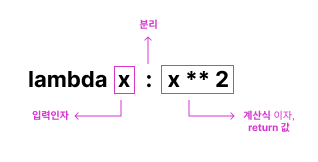

In [201]:
lambda_square = lambda x : x**2
lambda_square(3)

9

* 여러 개의 값을 인자로 사용해야 할 경우에는, `map()` 함수로 결합해서 사용

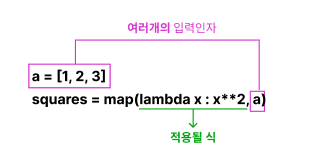

In [204]:
a = [1, 2, 3]
squares = map(lambda x:x**2, a)
list(squares)

[1, 4, 9]

#### **2. DF X lambda**

##### **기본형**

In [205]:
# titanic_df 의 'Name' 칼럼의 문자열 개수를 별도의 칼럼인 'Name_len'에 생성
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name_len', 'Name']].head(3)

,Name_len,Name
0,23,"Braund, Mr. Owen Harris"
1,51,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,22,"Heikkinen, Miss. Laina"


##### **if else 절 사용** 

In [208]:
# if else 절 사용

# 나이가 15세 미만이면 'Child', 그렇지 않으면 'Adult' 를 구분하는 새로운 칼럼 'Child_Adult' 생성
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age', 'Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [210]:
# 나이가 15세 이하이면 'Child' 15~60세 사이는 'Adult', 61세 이상은 'Elderly'로 분류하는 새로운 칼럼 'Age_Cat' 생성
titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x<=60 else 'Elderly'))
titanic_df['Age_Cat'].value_counts()

Age_Cat
Adult      786
Child       83
Elderly     22
Name: count, dtype: int64

##### **if 조건이 많은 경우, 별도 함수 생성**
- 함수 생성 후
- `.apply(lambda x : 함수(x))` 적용

In [213]:
# 5살 이하는 Baby
# 12살 이하는 Child
# 18살 이하는 Teenage
# 25살 이하는 Student
# 35살 이하는 Young Adult
# 60세 이하는 Adult
# 그 이상은 Elderly

def define_age_cat(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenage'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat


titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x : define_age_cat(x))
titanic_df[['Age', 'Age_Cat']].head(8)

,Age,Age_Cat
0,22.000000,Student
1,38.000000,Adult
2,26.000000,Young Adult
3,35.000000,Young Adult
4,35.000000,Young Adult
5,29.699118,Young Adult
6,54.000000,Adult
7,2.000000,Baby
